Módulos Python
==============

![04 dependencias modulos.png](<attachment:04 dependencias modulos.png>)

### Creación módulos

Un módulo es simplemente un `archivo.py` que contiene código: funciones, variables, clases, etc.

Sirve para organizar el código y reutilizarlo.
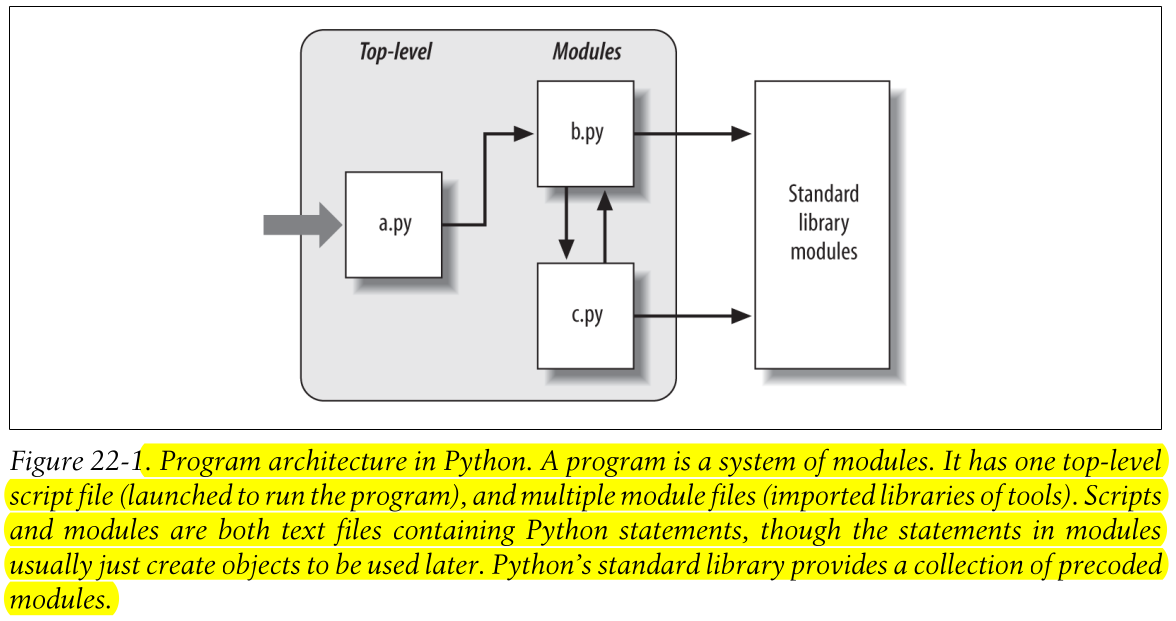

In [ ]:
def printer(x):     # Función dentro del módulo
    print(x)

Este sería el contenido de un archivo llamado modulo.py, y eso ya es un módulo.

## Uso de módulos

Hay dos formas de utilizar un módulo: 

1. Usar `import`:

In [ ]:
import src.modulo as modulo

modulo.printer("Hello world!")

* Importa el módulo completo.
* Para usar algo dentro del módulo, hay que escribir el nombre del módulo antes (`modulo.printer`).

2. Usar `from ... import`:

In [ ]:
from src.modulo import printer

printer("Hello world!")

* Importa solo lo que necesitas.
* No necesitas escribir el nombre del módulo antes de usarlo.

### sys.path

`sys.path` es una lista de carpetas donde Python busca módulos.

In [ ]:
import sys
sys.path.append('..')

Eso significa: "agrega la carpeta padre para que Python pueda encontrar los archivos".

Esto es útil cuando los módulos están en otras carpetas.

### Sentencia import

El nombre que pones después de `import` corresponde a un **archivo o módulo**.

Python carga ese archivo y crea una **variable** con ese nombre.

Puedes importar **uno o varios módulos** usando comas.

In [ ]:
import src.modulo as modulo                      # Get module as a whole (one or more)
modulo.printer("Hello world!")                   # Qualify to get names
# Hello world!

Hello world!


### Sentencia from

`from modulo import nombre` copia solo nombres específicos desde un módulo.

`from modulo import nombre, nombre` permite listar uno o más nombres para ser copiados separados por comas.

In [ ]:
from src.modulo import printer      # Copy out a variable (one or more) 
printer('Hello world!')             # No need to qualify name
# Hello world!

Hello world!


### Sentencia from *

Cuando usamos `*` copia **todos los nombres** (funciones, variables, clases) del módulo al espacio actual de tu script.

In [ ]:
from src.modulo import *       # Copy out _all_ variables 
printer('Hello world!')
# Hello world!

Hello world!


### Sólo se importa una vez

Un módulo solo se carga y ejecuta **una vez por programa**.

Las importaciones posteriores **solo recuperan** el módulo que ya está en memoria.

Esto hace que Python sea más rápido y eficiente.

```python
# modulo_simple
print("modulo simple")
spam = 1
```

In [ ]:
import src.modulo_simple as simple   # Primera importación: carga y ejecuta el código del archivo

modulo simple


In [ ]:
simple.spam              # La variable spam se inicializa en el momento de la importación
                         # 1

1

In [ ]:
simple.spam = 2                                 # Cambiar atributo en el módulo
import src.modulo_simple as simple              # Simplemente recupera el módulo ya cargado
simple.spam                                     # El código no se volvió a ejecutar: atributo sin cambios
                                                # 2

2

In [ ]:
# Fuerzo a iPython a que resetee las variables globales y recargue los modulos. 
# Es necesario para que al "ejecutar todo" en el notebook este ejercicio y los siguientes.
# Sino, click en "Reiniciar"
# importlib.reload() recarga un modulo previamente importado.
# El argumento debe ser un objeto modulo, así que debe haber sido importado 
# previamente con exito.
import importlib
importlib.reload(simple)

modulo simple


<module 'src.modulo_simple' from '/Users/usu/Desktop/codigo/gist/python-fundamentals-nb/notebooks/../src/modulo_simple.py'>

### import y from son asignaciones

Como `def`, `import` y `from` **no son instrucciones especiales del compilador**, sino **líneas de código normales** que se ejecutan cuando Python llega a ellas

**Son como hacer una asignación**, por ejemplo:

x = 10

Pero en lugar de asignar números, se asignan módulos o nombres traídos desde módulos


- Pueden estar dentro de un `if` si la condición se cumple; 
- Pueden estar dentro de una función, pero solo se importa cuando llamas a la función, no antes;
- Pueden estar en un `try/except` si un módulo existe sino, usar uno alternativo

No se resuelve ni ejecuta hasta que Python llega a esa línea

### Cambiando mutables en módulos

También como `def`,  `import` y `from` son asignaciones implícitas:

- `import` asigna un objeto módulo entero a un único nombre
- `from` asigna uno o más nombres a objetos con los mismos nombres en otro módulo

In [ ]:
# modulo_small
x = 1
y = [1, 2]

In [ ]:
from src.modulo_small import x, y       # Copia dos nombres
x = 42                                  # Cambios locales solo en x
y[0] = 42                               # Cambios compartidos mutables en el lugar
x, y

(42, [42, 2])

`x` no es un objeto compartido mutable, pero `y` sí:

In [ ]:
import src.modulo_small as small    # Obtener nombre del módulo
small.x                             # La x de Small no es mi x
                                    # 1
small.x, small.y                    # Pero compartimos un cambio mutable
                                    # small.y == [42, 2]

(1, [42, 2])

#### Cambios de nombres entre ficheros

In [ ]:
from src.modulo_small import x, y       # Copia dos nombres
x = 42                                  # Solo cambia mi x
import src.modulo_small as small        # Obtener el nombre del módulo
x, small.x     # 1
# small.x = 42                          # Cambios x en otro módulo

(42, 1)

In [ ]:
importlib.reload(small)

<module 'src.modulo_small' from '/Users/usu/Desktop/codigo/gist/python-fundamentals-nb/notebooks/../src/modulo_small.py'>

### Cuándo import es requerido

La única ocasión en la que debes usar ``import`` en vez de ``from`` es cuando tienes que usar el mismo nombre definido en dos módulos distintos

```py
# M.py
def func():
...do something...

# N.py
def func():
...do something else...
```

```py
# O.py
from M import func  
from N import func  # Esto sobrescribe la que recuperamos de M func ()
N.func()            # Solo llama a N.func
```

```py
# O.py
import M, N         # Obtén los módulos completos, no sus nombres
M.func()            # Ahora podemos usar ambos nombres
N.func()            # Los nombres de los módulos los hacen únicos         
```

### Diccionarios de espacios de nombres: __dict__

Los espacios de nombres de un módulo se almacenan como objetos diccionario.

In [ ]:
list(small.__dict__.keys())

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__file__',
 '__cached__',
 '__builtins__',
 'x',
 'y']

Podemos filtrar sólo aquellos nombres definidos por el usuario/a, excluyendo los definidos por el _Built-in_ de Python que comienzan y terminan por los caracteres `__`.

In [ ]:
list(name for name in small.__dict__.keys() if not name.startswith('__'))

['x', 'y']

## Modos de uso mixto: __name__ y __main__

Cada módulo tienes un atributo _built-in_ llamado __name__ que Python crea y asigna automáticamente como sigue:

- Si el fichero se ejecuta como un fichero / programa _top-level_ , __name__ toma el valor string "__main__" cuando arranca.
- En cambio, si el fichero está siendo importando, __name__ toma el valor del nombre del módulo como lo conocen sus clientes.

El resultado es que un módulo puede testear su propio __name__ para determinar si está siendo ejecutado o importado.

```py
def tester():
    print("It's Christmas in Heaven...")    
if __name__ == '__main__':                  # Only when run
    tester()                                # Not when imported
```

Este módulo define una funcion para clientes que la importan y usan como de costumbre:

```sh
>>> import runme
>>> runme.tester()
It's Christmas in Heaven...
```

Pero el módulo también incluye código al pié del fichero que se configura para invocar a la función de manera automática cuando este fichero se ejecuta como un programa autónomo:

```sh
c:\code> python runme.py
It's Christmas in Heaven...
```

La variable __name__ de un módulo sirve como _flag_ de su modo de uso, permitiendo a su código ser aprovechado tanto como librería importada como _script_ de alto nivel.

__name__ funciona como código de auto-test. Puedes usar el fichero en clientes importándolo y testear su lógica ejecutándolo desde la _shell_ del sistema.